In [1518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1519]:
listings = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstonetwo/Untitled Folder/dataclean.csv')

https://ctstatelibrary.org/cttowns/counties

In [1520]:
ct_cities = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstonetwo/Untitled Folder/CT city data.csv',header = None)

Renaming a Column

In [1521]:
colname = listings.columns
print(colname)

Index(['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp',
       'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total',
       'Sq Ft Est Heated Above Grade', 'Style or Rent Type', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office',
       'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage',
       'Parking', 'Age'],
      dtype='object')


In [1522]:
newnames =['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp',
       'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total',
       'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office',
       'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage',
       'Parking', 'Age']

In [1523]:
listings.columns = newnames

In [1524]:
listings['Status Change Timestamp'] = pd.to_datetime(listings['Status Change Timestamp'])

In [1525]:
listings['Status Change Timestamp'] 

0       2020-09-13
1       2021-03-18
2       2021-05-14
3       2021-03-10
4       2021-04-22
           ...    
57405   2021-02-28
57406   2021-02-05
57407   2021-06-03
57408   2021-03-08
57409   2021-05-25
Name: Status Change Timestamp, Length: 57410, dtype: datetime64[ns]

# 1. Preparations

###  A. Correcting Cities and adding County

Removing cities which aren't in CT by merging a table with CT counties

In [1526]:
ct_cities = ct_cities.iloc[:,[0,1]]

In [1527]:
ct_cities.columns = ['City','County']

In [1528]:
ct_cities.head()

City      County
0      Andover     Tolland
1      Ansonia   New Haven
2      Ashford     Windham
3         Avon    Hartford
4  Barkhamsted  Litchfield

In [1529]:
len(ct_cities.loc[:,'City'].unique())

169

In [1530]:
len(listings['City'].unique())

228

We have 58 cities which are incorrect

In [1531]:
ct_cities.loc[:,'City'].unique()

array(['Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted',
       'Beacon Falls', 'Berlin', 'Bethany', 'Bethel', 'Bethlehem',
       'Bloomfield', 'Bolton', 'Bozrah', 'Branford', 'Bridgeport',
       'Bridgewater', 'Bristol', 'Brookfield', 'Brooklyn', 'Burlington',
       'Canaan', 'Canterbury', 'Canton', 'Chaplin', 'Cheshire', 'Chester',
       'Clinton', 'Colchester', 'Colebrook', 'Columbia', 'Cornwall',
       'Coventry', 'Cromwell', 'Danbury', 'Darien', 'Deep River', 'Derby',
       'Durham', 'East Granby', 'East Haddam', 'East Hampton',
       'East Hartford', 'East Haven', 'East Lyme', 'East Windsor',
       'Eastford', 'Easton', 'Ellington', 'Enfield', 'Essex', 'Fairfield',
       'Farmington', 'Franklin', 'Glastonbury', 'Goshen', 'Granby',
       'Greenwich', 'Griswold', 'Groton', 'Guilford', 'Haddam', 'Hamden',
       'Hampton', 'Hartford', 'Hartland', 'Harwinton', 'Hebron', 'Kent',
       'Killingly', 'Killingworth', 'Lebanon', 'Ledyard', 'Lisbon',
       'Litchfield', 'L

In [1532]:
listings['City'].unique()

array(['Amenia', 'Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted',
       'Beacon Falls', 'Bedford', 'Beekman', 'Berlin', 'Bethany',
       'Bethel', 'Bethlehem', 'Bloomfield', 'Bolton', 'Bozrah',
       'Branford', 'Brewster', 'Bridgeport', 'Bridgewater', 'Bristol',
       'Brookfield', 'Brooklyn', 'Burlington', 'Canaan', 'Canterbury',
       'Canton', 'Carmel', 'Chaplin', 'Cheshire', 'Chester', 'Chicopee',
       'Clinton', 'Colchester', 'Cold Spring', 'Colebrook', 'Columbia',
       'Cornwall', 'Coventry', 'Cromwell', 'Croton-on-Hudson', 'Danbury',
       'Darien', 'Deep River', 'Derby', 'Douglas', 'Dover', 'Durham',
       'East Fishkill', 'Ellington', 'Enfield', 'East Granby',
       'East Haddam', 'East Hampton', 'East Hartford', 'East Haven',
       'East Lyme', 'East Windsor', 'Eastford', 'Essex',
       'East Longmeadow', 'Easton', 'Egremont', 'Greenwich', 'Fairfield',
       'Farmington', 'Glastonbury', 'Granby', 'Griswold', 'Groton',
       'Guilford', 'Fishers Island'

Using a left merge on the listing data we are identifying the cities which aren't on the CT cities list but in the Listing data

In [1533]:
values_drop = pd.merge(listings,ct_cities,on = 'City', how = 'left', indicator = True )

In [1534]:
values_drop = values_drop[values_drop['_merge']=='left_only']

In [1535]:
values_drop.shape

(162, 27)

We will be dropping 162 observations with incorrect city names.  The city names are included below

In [1536]:
values_drop['City'].unique()

array(['Amenia', 'Bedford', 'Beekman', 'Brewster', 'Carmel', 'Chicopee',
       'Cold Spring', 'Croton-on-Hudson', 'Douglas', 'Dover',
       'East Fishkill', 'East Longmeadow', 'Egremont', 'Fishers Island',
       'Foster', 'Gallatin', 'Glocester', 'Greenburgh', 'Lewisboro',
       'Hadley', 'Hampden', 'Holland', 'Kent NY', 'LaGrange',
       'Longmeadow', 'Ludlow', 'Millerton', 'Mount Washington',
       'Narragansett', 'New Marlborough', 'North Castle', 'Ossining',
       'Patterson', 'Pawling', 'Poughkeepsie', 'Pound Ridge',
       'Putnam Valley', 'Richmond', 'Somers NY', 'Rye Brook',
       'Sandisfield', 'Sheffield', 'South Kingston', 'Southbridge',
       'Tarrytown', 'Springfield', 'Southwick', 'Warwick',
       'Wappingers Falls', 'White Plains', 'West Springfield', 'Westerly',
       'Webster', 'West Stockbridge', 'Unknown MA City',
       'Unknown RI City', 'Yorktown', 'Unknown City', 'Unknown NY City'],
      dtype=object)

In [1537]:
listings.shape

(57410, 25)

An inner merge will take observations that have share city in both the listing data AND the CT city list.

In [1538]:
listings = pd.merge(listings,ct_cities,on = 'City', how = 'inner' )

In [1539]:
listings.head()

Unnamed: 0  #       MLS# Status Status Change Timestamp Prop Type  \
0           2  1  170378716   CLSD              2021-05-14        SF   
1           3  1  170305413   CLSD              2021-03-10        SF   
2           4  1  170365013   CLSD              2021-04-22        SF   
3           5  1  170316531   CLSD              2020-09-02        SF   
4           6  1  170359991   CLSD              2021-03-12        SF   

            Address     City  Acres  Sq Ft Total  ...       Listing Agent  \
0   64 Long Hill Rd  Andover   0.92         1800  ...       Mike Defosses   
1       560 Route 6  Andover   4.63         1724  ...            Team Rio   
2       7 Bailey Rd  Andover   1.49         1138  ...  Erica L Molochnick   
3  56 Pine Ridge Dr  Andover   0.85         1476  ...      Lisa A Barstow   
4       213 Route 6  Andover   0.62         1074  ...      Lisa A Barstow   

  List Office  list_price  close_price  Full Bath  Half Bath Garage  \
0      EXRE01      150000        97500          1          0      0   
1      EXRE01      119900       100000          1          0      0   
2      REDB01      170000       150000          1          0      2   
3      KWGH60      169000       180000          1          0      2   
4      KWLP05      174900       182000          2          0      2   

              Parking   Age   County  
0  Off Street Parking  86.0  Tolland  
1  Off Street Parking  73.0  Tolland  
2     Detached Garage  98.0  Tolland  
3     Attached Garage  64.0  Tolland  
4     Detached Garage  82.0  Tolland  

[5 rows x 26 columns]

In [1540]:
listings.shape

(57248, 26)

In [1541]:
len(listings['City'].unique())

169

### B. Removing Unused columns and columns with 0 variation

In [1542]:
print([i for i in listings.columns])

['Unnamed: 0', '#', 'MLS#', 'Status', 'Status Change Timestamp', 'Prop Type', 'Address', 'City', 'Acres', 'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total', 'Beds Total', 'Year Built', 'DOM', 'Listing Agent', 'List Office', 'list_price', 'close_price', 'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County']


We start by removing meaningless columns and columns containing information about Real Estate office and agent

In [1543]:
listings = listings.drop('List Office', axis =1)

In [1544]:
listings = listings.drop('Listing Agent', axis =1)

In [1545]:
listings = listings.drop('#', axis =1)

In [1546]:
listings = listings.drop('Unnamed: 0', axis =1)

Now removing columns with no variation

In [1547]:
listings['Status'].unique()

array(['CLSD'], dtype=object)

In [1548]:
listings = listings.drop('Status', axis =1)

We will separate the Condo data from the Single Family data to allow for separate exploration.  Then drop the type column

In [1549]:
print(listings['Prop Type'].value_counts())

SF    45564
CO    11438
CP      246
Name: Prop Type, dtype: int64


In [1550]:
CO_listings = listings[listings['Prop Type']=='CO']

In [1551]:
listings = listings[listings['Prop Type']=='SF']

In [1552]:
listings = listings.drop('Prop Type', axis =1)

In [1553]:
CO_listings = CO_listings.drop('Prop Type', axis =1)

In [1554]:
print(listings.head())

        MLS# Status Change Timestamp           Address     City  Acres  \
0  170378716              2021-05-14   64 Long Hill Rd  Andover   0.92   
1  170305413              2021-03-10       560 Route 6  Andover   4.63   
2  170365013              2021-04-22       7 Bailey Rd  Andover   1.49   
3  170316531              2020-09-02  56 Pine Ridge Dr  Andover   0.85   
4  170359991              2021-03-12       213 Route 6  Andover   0.62   

   Sq Ft Total  Sq Ft Est Heated Above Grade     Style  Rooms Total  \
0         1800                        1800.0  Colonial            7   
1         1724                        1724.0     Ranch            6   
2         1138                        1138.0  Bungalow            6   
3         1476                         864.0     Ranch            4   
4         1074                        1074.0  Cape Cod            6   

   Beds Total  Year Built    DOM  list_price  close_price  Full Bath  \
0           3      1935.0    8.0      150000        9750

In [1555]:
listings.shape

(45564, 20)

In [1556]:
CO_listings.shape

(11438, 20)

# 2. Removing Outliers

#### Garage

In [1557]:
print(listings[listings['Garage']>10].loc[:,'Garage'].value_counts())

99999    83
12        5
11        5
13        3
14        2
18        1
17        1
Name: Garage, dtype: int64


In [1558]:
print(listings[listings['Garage']>20].describe())

           Acres  Sq Ft Total  Sq Ft Est Heated Above Grade  Rooms Total  \
count  83.000000    83.000000                     83.000000    83.000000   
mean    1.318675  1872.783133                   1772.481928     6.867470   
std     3.501713   839.568081                    835.102044     1.936624   
min     0.080000   612.000000                    612.000000     3.000000   
25%     0.195000  1297.500000                   1224.000000     6.000000   
50%     0.380000  1702.000000                   1572.000000     7.000000   
75%     0.790000  2197.000000                   2115.000000     8.000000   
max    24.800000  4641.000000                   4641.000000    14.000000   

       Beds Total   Year Built         DOM    list_price   close_price  \
count   83.000000    83.000000   83.000000  8.300000e+01  8.300000e+01   
mean     3.180723  1937.036145   57.987952  3.801157e+05  3.755169e+05   
std      0.783123    41.244791   67.670380  3.700462e+05  3.613470e+05   
min      1.000000  

In [1559]:
listings = listings[listings['Garage']<20]

In [1560]:
listings.shape

(45481, 20)

I removed 83 observations which I had coded to 99999 that had ambiguous  values for garage

## A. 1.5*IQR

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

standardizing removal of outliers 1.5* interquartile range

In [1561]:
listings.columns

Index(['MLS#', 'Status Change Timestamp', 'Address', 'City', 'Acres',
       'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'list_price', 'close_price',
       'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County'],
      dtype='object')

In [1562]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45481 entries, 0 to 57247
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MLS#                          45481 non-null  object        
 1   Status Change Timestamp       45481 non-null  datetime64[ns]
 2   Address                       45481 non-null  object        
 3   City                          45481 non-null  object        
 4   Acres                         45481 non-null  float64       
 5   Sq Ft Total                   45481 non-null  int64         
 6   Sq Ft Est Heated Above Grade  45481 non-null  float64       
 7   Style                         45481 non-null  object        
 8   Rooms Total                   45481 non-null  int64         
 9   Beds Total                    45481 non-null  int64         
 10  Year Built                    45481 non-null  float64       
 11  DOM                         

#### i. Acres

In [1563]:
a,b =listings['Acres'].quantile([.25,.75])
print(a,b)
iqr = b-a
print(iqr)

0.24 1.15
0.9099999999999999


In [1564]:
lower = a - (1.5*iqr)
upper = b + (1.5*iqr)
print(lower, upper)

-1.1249999999999998 2.5149999999999997


In [1565]:
def outliers(df):
    a,b =df.quantile([.25,.75])
    iqr = b-a
    print("\n25 percentile: ", a, '\n75 percentile: ', b, '\nIQR: ', iqr)
    lower = a - (1.5*iqr)
    upper = b + (1.5*iqr)
    print('Lower: ',lower,'Upper', upper)
    return((df>lower) & (df<upper))
 

In [1566]:
outlier_bool = outliers(listings['Acres'])


25 percentile:  0.24 
75 percentile:  1.15 
IQR:  0.9099999999999999
Lower:  -1.1249999999999998 Upper 2.5149999999999997


In [1567]:
listings = listings[outlier_bool]

In [1568]:
listings.shape

(41400, 20)

#### ii. Sqft Total

In [1569]:
outlier_bool = outliers(listings['Sq Ft Total'])


25 percentile:  1404.0 
75 percentile:  2650.0 
IQR:  1246.0
Lower:  -465.0 Upper 4519.0


In [1570]:
listings = listings[outlier_bool]

In [1571]:
listings.shape

(39147, 20)

#### iii. Sq Ft Est Heated Above Grade

In [1572]:
outlier_bool = outliers(listings['Sq Ft Est Heated Above Grade'])


25 percentile:  1252.0 
75 percentile:  2244.0 
IQR:  992.0
Lower:  -236.0 Upper 3732.0


In [1573]:
listings = listings[outlier_bool]

In [1574]:
listings.shape

(38264, 20)

#### iv. Rooms Total

In [1575]:
outlier_bool = outliers(listings['Rooms Total'])


25 percentile:  6.0 
75 percentile:  8.0 
IQR:  2.0
Lower:  3.0 Upper 11.0


In [1576]:
listings = listings[outlier_bool]

In [1577]:
listings.shape

(37205, 20)

#### v. Beds Total

In [1578]:
outlier_bool = outliers(listings['Beds Total'])


25 percentile:  3.0 
75 percentile:  4.0 
IQR:  1.0
Lower:  1.5 Upper 5.5


In [1579]:
listings = listings[outlier_bool]

In [1580]:
listings.shape

(36988, 20)

#### vi. List Price

In [1581]:
outlier_bool = outliers(listings['list_price'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  225000.0 
75 percentile:  425000.0 
IQR:  200000.0
Lower:  -75000.0 Upper 725000.0


(34479, 20)

#### vii. Close Price

In [1582]:
outlier_bool = outliers(listings['close_price'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  225000.0 
75 percentile:  395000.0 
IQR:  170000.0
Lower:  -30000.0 Upper 650000.0


(33658, 20)

#### viii. Full Bath

In [1583]:
outlier_bool = outliers(listings['Full Bath'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  1.0 
75 percentile:  2.0 
IQR:  1.0
Lower:  -0.5 Upper 3.5


(33473, 20)

#### ix.  Half Bath

In [1584]:
outlier_bool = outliers(listings['Half Bath'])
listings = listings[outlier_bool]
listings.shape


25 percentile:  0.0 
75 percentile:  1.0 
IQR:  1.0
Lower:  -1.5 Upper 2.5


(33462, 20)

# 3. Distributions

In [1585]:
listings.describe()

Acres   Sq Ft Total  Sq Ft Est Heated Above Grade   Rooms Total  \
count  33462.000000  33462.000000                  33462.000000  33462.000000   
mean       0.591166   1838.872542                   1656.403951      6.707190   
std        0.525112    665.633840                    580.206087      1.378808   
min        0.010000    480.000000                    396.000000      4.000000   
25%        0.220000   1332.000000                   1220.000000      6.000000   
50%        0.380000   1720.000000                   1514.000000      7.000000   
75%        0.850000   2224.000000                   2000.000000      8.000000   
max        2.510000   4512.000000                   3731.000000     10.000000   

         Beds Total    Year Built           DOM     list_price    close_price  \
count  33462.000000  33462.000000  33462.000000   33462.000000   33462.000000   
mean       3.217351   1957.302552     41.559977  307286.444624  310394.221087   
std        0.667353     35.267381     60.649284  121540.363850  121487.647460   
min        2.000000   1660.000000      0.000000   10000.000000   10500.000000   
25%        3.000000   1946.000000      5.000000  219900.000000  221999.250000   
50%        3.000000   1959.000000     21.000000  280000.000000  285000.000000   
75%        4.000000   1978.000000     60.000000  379900.000000  384975.000000   
max        5.000000   2021.000000   2009.000000  722000.000000  649900.000000   

          Full Bath     Half Bath        Garage           Age  
count  33462.000000  33462.000000  33462.000000  33462.000000  
mean       1.697806      0.493724      1.297113     63.697448  
std        0.633112      0.538030      0.908768     35.267381  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      1.000000     43.000000  
50%        2.000000      0.000000      1.000000     62.000000  
75%        2.000000      1.000000      2.000000     75.000000  
max        3.000000      2.000000     14.000000    361.000000

   ###  A. City

Waterbury        1065
West Hartford     805
Stratford         790
Hamden            777
Bridgeport        741
Bristol           715
Milford           644
Meriden           617
Manchester        607
Enfield           595
East Hartford     582
West Haven        571
Southington       561
Norwalk           556
Middletown        518
New Britain       512
Trumbull          505
Torrington        501
Stamford          494
Danbury           489
Name: City, dtype: int64


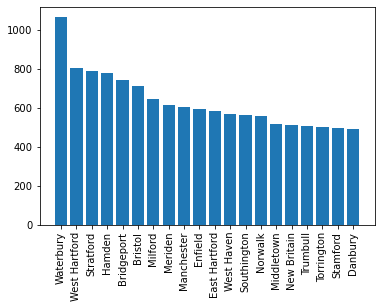

In [1586]:
topcities = listings['City'].value_counts().sort_values(ascending=False).head(20)
print(topcities)


barx = topcities.index.values


plt.bar(barx,
        listings['City'].value_counts().head(20))

plt.xticks(rotation = 90)
plt.show()

Hartford      9026
New Haven     8389
Fairfield     6285
New London    2908
Litchfield    2195
Middlesex     2014
Tolland       1515
Windham       1130
Name: County, dtype: int64


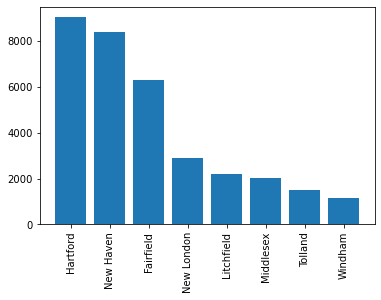

In [1587]:
topcounty = listings['County'].value_counts().sort_values(ascending=False)
print(topcounty)


barx = topcounty.index.values


plt.bar(barx, listings['County'].value_counts())

plt.xticks(rotation = 90)
plt.show()



### B. Acres


In [1588]:
print(listings['Acres'].describe())

count    33462.000000
mean         0.591166
std          0.525112
min          0.010000
25%          0.220000
50%          0.380000
75%          0.850000
max          2.510000
Name: Acres, dtype: float64


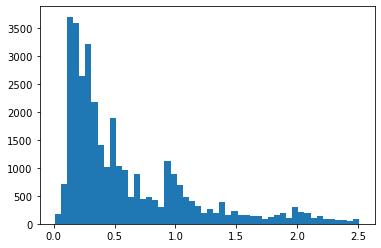

In [1589]:
plt.hist(listings['Acres'], bins =50)
plt.show()

In [1590]:
print(listings['Acres'].value_counts().head(20))

0.17    1070
0.23     850
0.11     800
0.14     772
0.18     721
0.46     669
0.21     644
0.28     641
0.29     640
0.26     622
0.22     608
0.16     606
0.24     593
1.00     591
0.25     586
0.19     584
0.20     573
0.34     554
0.35     546
0.15     537
Name: Acres, dtype: int64


### C. Sqft Total

In [1591]:
print(listings['Sq Ft Total'].describe())

count    33462.000000
mean      1838.872542
std        665.633840
min        480.000000
25%       1332.000000
50%       1720.000000
75%       2224.000000
max       4512.000000
Name: Sq Ft Total, dtype: float64


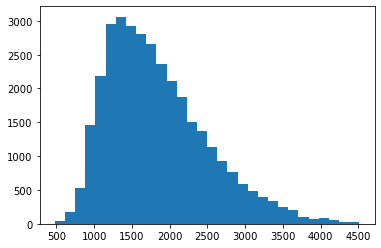

In [1592]:
plt.hist(listings['Sq Ft Total'], bins =30)
plt.show()

log normal? natural log transformation

### D. Sq Ft Est Heated Above Grade

In [1593]:
print(listings['Sq Ft Est Heated Above Grade'].describe())

count    33462.000000
mean      1656.403951
std        580.206087
min        396.000000
25%       1220.000000
50%       1514.000000
75%       2000.000000
max       3731.000000
Name: Sq Ft Est Heated Above Grade, dtype: float64


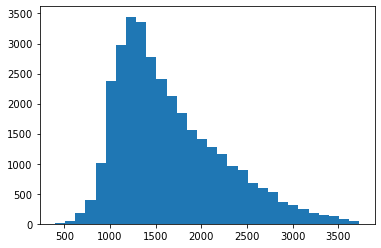

In [1594]:
plt.hist(listings['Sq Ft Est Heated Above Grade'],bins = 30)
plt.show()

### E. Style

In [1595]:
listings['Style'].value_counts()

Colonial             10958
Ranch                 8638
Cape Cod              7226
Raised Ranch          3186
Split Level           1373
Contemporary           873
Bungalow               372
Other                  164
Cottage                117
Antique                115
Half Duplex             98
Farm House              89
Hi-Ranch                67
Victorian               65
Tudor                   21
Row House               21
Saltbox                 20
Mobile Home             16
Log                     13
Barn                    10
A-Frame                  8
Modern                   5
Chalet                   3
Georgian Colonial        1
Garden Ranch             1
European                 1
Chateau                  1
Name: Style, dtype: int64

Colonial        10958
Ranch            8638
Cape Cod         7226
Raised Ranch     3186
Split Level      1373
Contemporary      873
Name: Style, dtype: int64


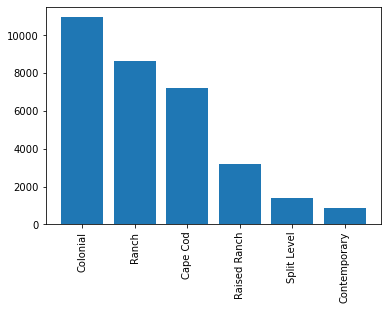

In [1596]:
topstyle = listings['Style'].value_counts().sort_values(ascending=False).head(6)
print(topstyle)


barx = topstyle.index.values


plt.bar(barx,
        listings['Style'].value_counts().head(6))

plt.xticks(rotation = 90)
plt.show()


### F. Rooms Total

In [1597]:
print(listings['Rooms Total'].describe())

count    33462.000000
mean         6.707190
std          1.378808
min          4.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: Rooms Total, dtype: float64


6     9741
7     8090
8     5511
5     5332
9     2638
4     1105
10    1045
Name: Rooms Total, dtype: int64


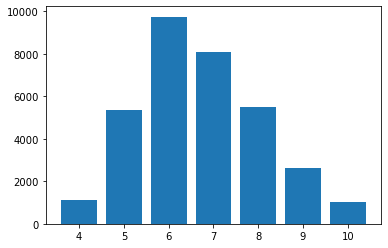

In [1598]:
barvalue = listings['Rooms Total'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)

plt.show()



### G. Beds Total

In [1599]:
print(listings['Beds Total'].describe())

count    33462.000000
mean         3.217351
std          0.667353
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Beds Total, dtype: float64


3    19760
4     9097
2     3678
5      927
Name: Beds Total, dtype: int64


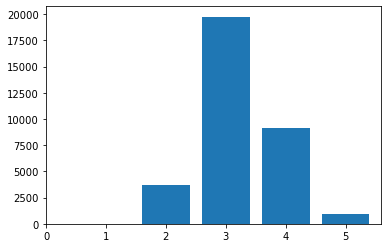

In [1600]:
barvalue = listings['Beds Total'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(6)))
plt.show()


### H. Year Built

In [1601]:
print(listings['Year Built'].describe())

count    33462.000000
mean      1957.302552
std         35.267381
min       1660.000000
25%       1946.000000
50%       1959.000000
75%       1978.000000
max       2021.000000
Name: Year Built, dtype: float64


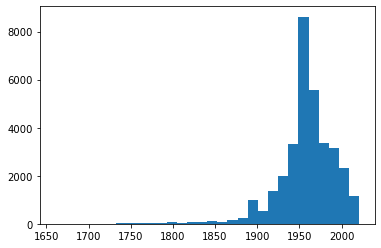

In [1602]:
plt.hist(listings['Year Built'], bins =30)
plt.show()

### I. Days on Market

In [1603]:
print(listings['DOM'].describe())

count    33462.000000
mean        41.559977
std         60.649284
min          0.000000
25%          5.000000
50%         21.000000
75%         60.000000
max       2009.000000
Name: DOM, dtype: float64


In [1604]:
print(listings['DOM'].value_counts().head(20))

3.0     2550
4.0     2146
2.0     2086
5.0     1470
6.0     1065
1.0      971
7.0      781
8.0      597
9.0      494
10.0     463
12.0     427
11.0     408
0.0      380
13.0     379
65.0     374
21.0     350
64.0     341
15.0     335
18.0     333
14.0     330
Name: DOM, dtype: int64


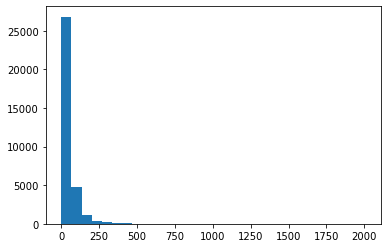

In [1605]:
plt.hist(listings['DOM'],bins = 30)
plt.show()

### J .Listing Price

In [1606]:
print(listings['list_price'].describe())

count     33462.000000
mean     307286.444624
std      121540.363850
min       10000.000000
25%      219900.000000
50%      280000.000000
75%      379900.000000
max      722000.000000
Name: list_price, dtype: float64


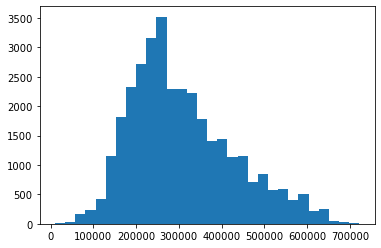

In [1607]:
plt.hist(listings['list_price'], bins =30)
plt.show()

### K. Closing Price

In [1608]:
print(listings['close_price'].describe())

count     33462.000000
mean     310394.221087
std      121487.647460
min       10500.000000
25%      221999.250000
50%      285000.000000
75%      384975.000000
max      649900.000000
Name: close_price, dtype: float64


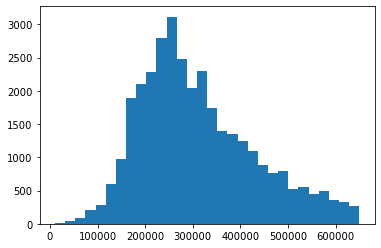

In [1609]:
plt.hist(listings['close_price'], bins =30)
plt.show()

### L. Full Bath

In [1610]:
print(listings['Full Bath'].describe())

count    33462.000000
mean         1.697806
std          0.633112
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Full Bath, dtype: float64


2    17006
1    13278
3     3174
0        4
Name: Full Bath, dtype: int64


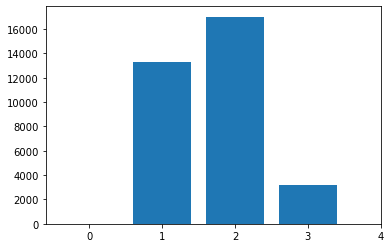

In [1611]:
barvalue = listings['Full Bath'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(5)))
plt.show()


### M. Half Bath

In [1612]:
print(listings['Half Bath'].describe())

count    33462.000000
mean         0.493724
std          0.538030
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Half Bath, dtype: float64


0    17602
1    15199
2      661
Name: Half Bath, dtype: int64


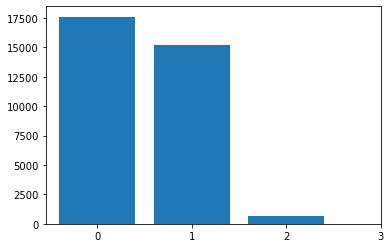

In [1613]:
barvalue = listings['Half Bath'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(4)))
plt.show()


### Garage

2     14739
1      9647
0      7804
3       960
4       233
5        43
6        24
8         6
7         2
14        1
12        1
11        1
9         1
Name: Garage, dtype: int64


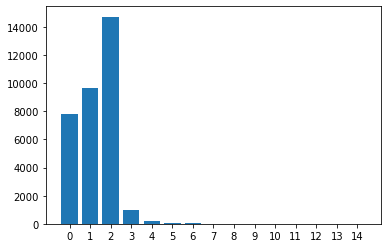

In [1614]:
barvalue = listings['Garage'].value_counts()
print(barvalue)


barx = barvalue.index.values


plt.bar(barx, barvalue)
plt.xticks((range(15)))
plt.show()


Look at box and whiskers 

# Interactions and correlations

## Means

#### By County

In [1615]:
mean_close_price_by_county = listings['close_price'].groupby(listings['County']).mean()

In [1616]:
mean_close_price_by_county 

County
Fairfield     414273.519491
Hartford      284225.182584
Litchfield    278572.377677
Middlesex     318034.302880
New Haven     291091.583264
New London    282869.885488
Tolland       278436.744554
Windham       246826.385841
Name: close_price, dtype: float64

In [1617]:
prices_by_county = listings[['County','close_price']]

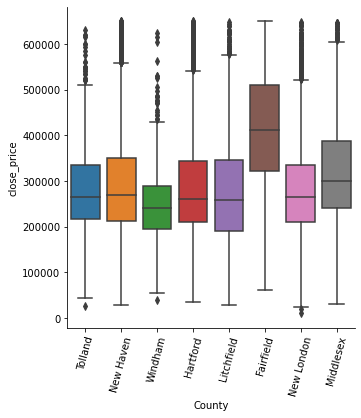

In [1618]:
sns.catplot(x= 'County', y='close_price', kind="box", data = prices_by_county)
plt.xticks(rotation = 75)
plt.show()

['Tolland' 'New Haven' 'Windham' 'Hartford' 'Litchfield' 'Fairfield'
 'New London' 'Middlesex']


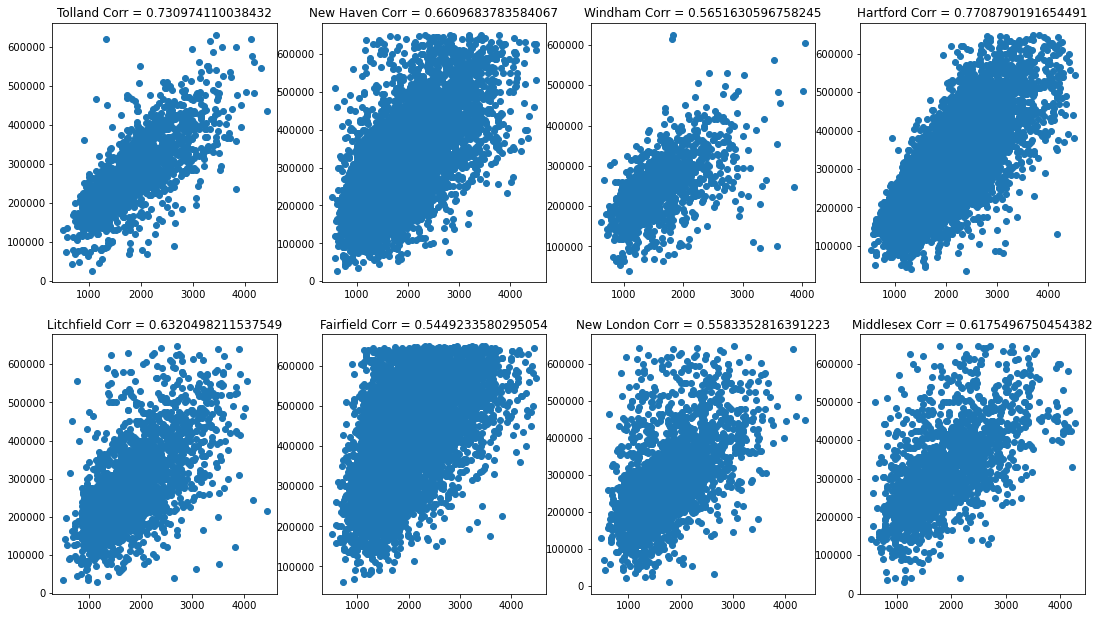

In [1619]:
fig, axs = plt.subplots(2,4)
counties = listings['County'].unique()
print(counties)
counties = iter(counties)
fig.set_size_inches(18.5, 10.5)

for i in range(1,9):
        county = next(counties)
        county_df = listings[listings['County']==county]
        
        plt.subplot(2,4,i)
        plt.scatter(county_df['Sq Ft Total'],county_df['close_price'])
        corre= county_df['Sq Ft Total'].corr(county_df['close_price'])
        title = county + ' Corr = ' + str(corre)
        plt.title(title)
        
               
plt.show()

In [1620]:
def county_corr(col):
    sns.color_palette("pastel")
    fig, axs = plt.subplots(2,4)
    plt.suptitle("Closing Price vs. " + col + " by County")
    fig.tight_layout()
    
    counties = listings['County'].unique()
    counties = iter(counties)
    fig.set_size_inches(18.5, 8)

    for i in range(1,9):
        county = next(counties)
        county_df = listings[listings['County']==county]
        
        plt.subplot(2,4,i)
       
        sns.regplot(x=col, y='close_price',data =county_df,fit_reg=True,line_kws={"color": "red"})
        line_kws={"color": "red"}
        corre= county_df[col].corr(county_df['close_price'])
        title = county + ' Corr = ' + str(corre)
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel('Closing Price')
        
               
 

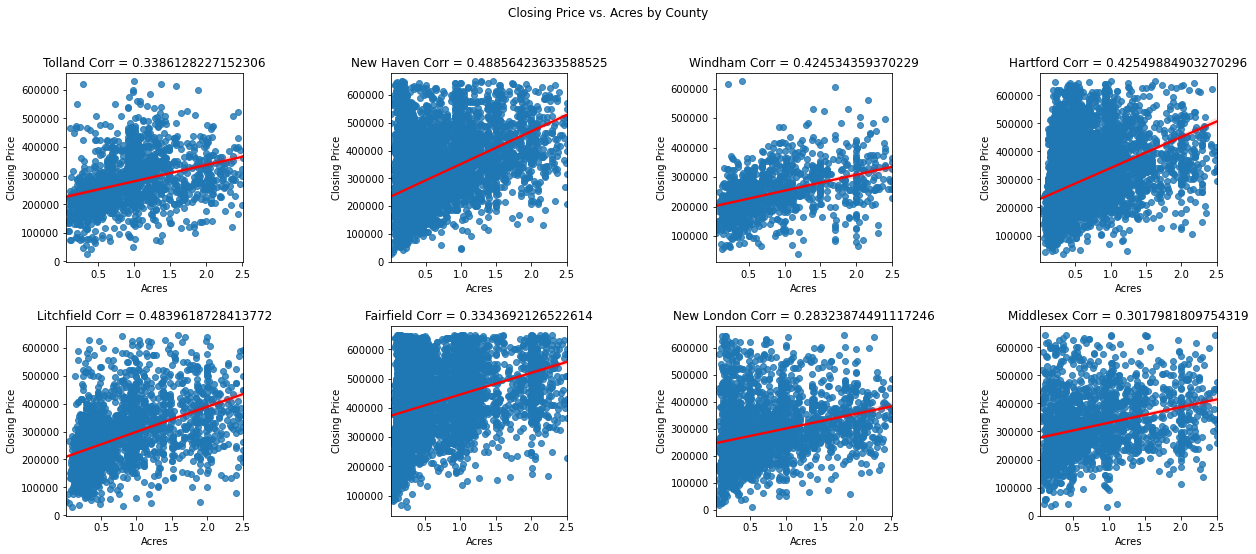

In [1621]:
county_corr('Acres')

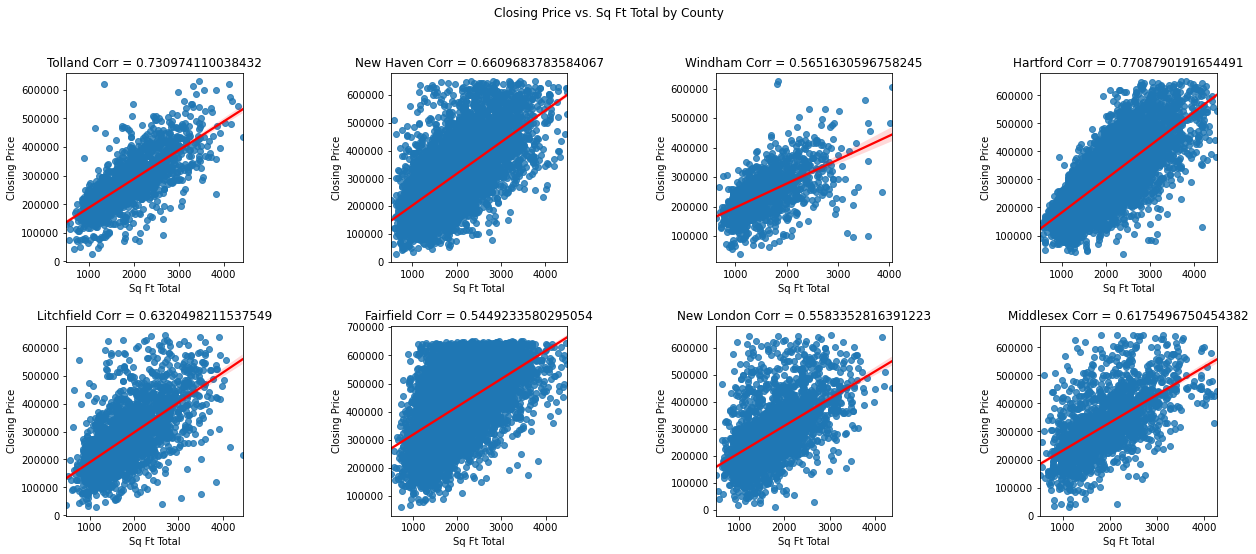

In [1622]:
county_corr('Sq Ft Total')

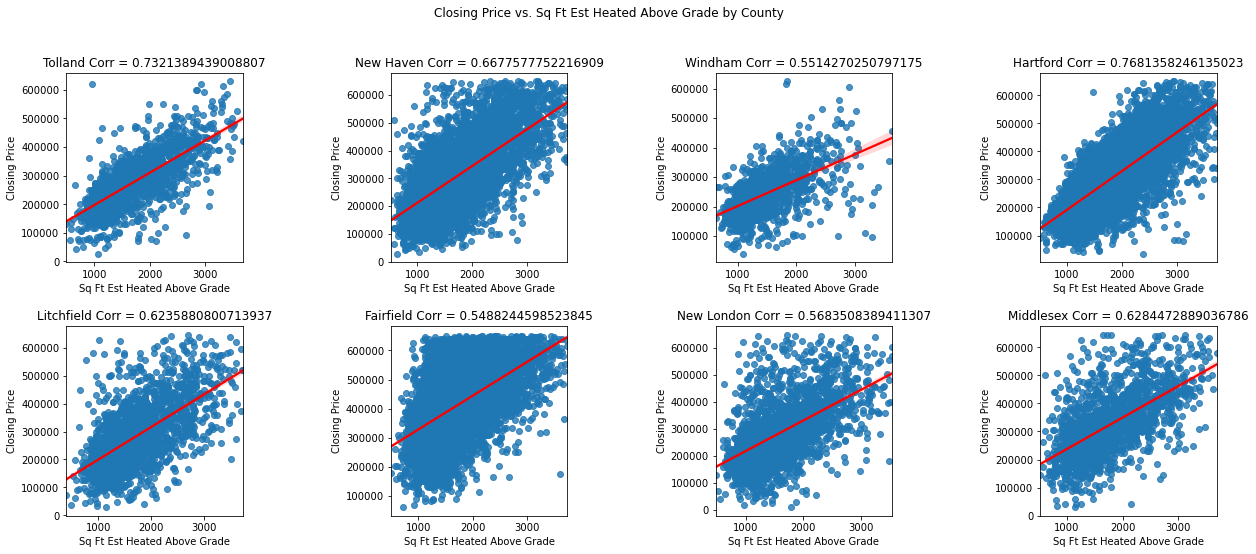

In [1623]:
county_corr('Sq Ft Est Heated Above Grade')

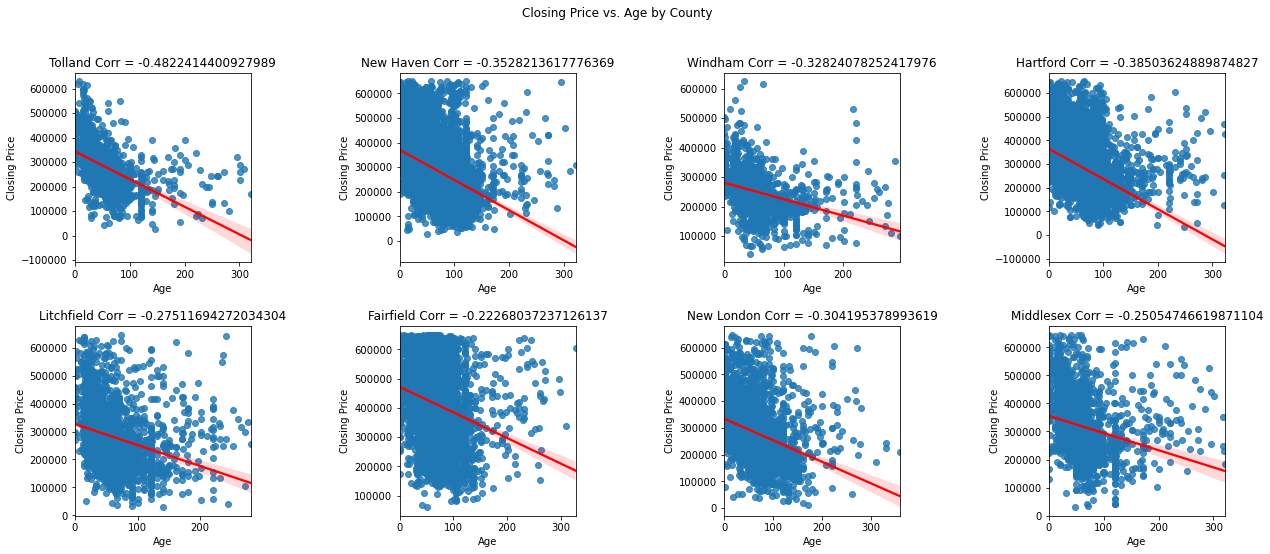

In [1624]:
county_corr('Age')

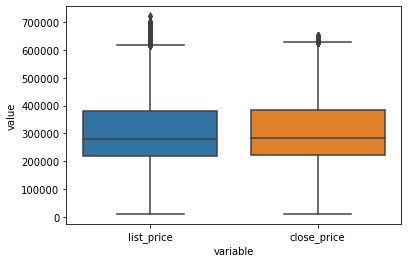

          list_price    close_price
count   33462.000000   33462.000000
mean   307286.444624  310394.221087
std    121540.363850  121487.647460
min     10000.000000   10500.000000
25%    219900.000000  221999.250000
50%    280000.000000  285000.000000
75%    379900.000000  384975.000000
max    722000.000000  649900.000000


In [1625]:
close_list_df = pd.melt(listings[['list_price','close_price']])

sns.boxplot(x = 'variable', y = 'value', data = close_list_df)

plt.show()
print(listings[['list_price', 'close_price']].describe())

count    33461.000000
mean         0.013035
std          0.067077
min         -0.771890
25%         -0.017506
50%          0.001821
75%          0.041754
max          1.454545
dtype: float64


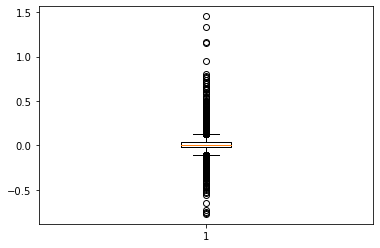

In [1626]:
close_list_diff =listings[((listings['close_price']-listings['list_price'])/listings['list_price'])<5]
close_list_diff = (close_list_diff['close_price']-close_list_diff['list_price'])/close_list_diff['list_price']
print(close_list_diff.describe())
plt.boxplot(close_list_diff)
plt.show()

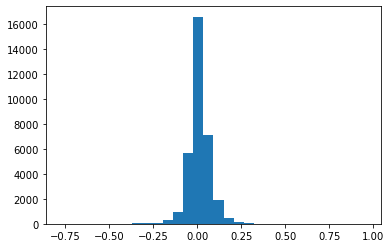

In [1627]:
plt.hist(close_list_diff[close_list_diff<1], bins =30)
plt.show()

In [1628]:
print('The number of listings which sold below listing price was',len(close_list_diff[close_list_diff<0]), "listings.\n The number of listings which sold above listing price was",len(close_list_diff[close_list_diff>0]), 'listings.')
print('The number of listings which sold at listing prices was',len(close_list_diff[close_list_diff==0]))

The number of listings which sold below listing price was 11050 listings.
 The number of listings which sold above listing price was 18302 listings.
The number of listings which sold at listing prices was 4109


### Correlations

<AxesSubplot:>

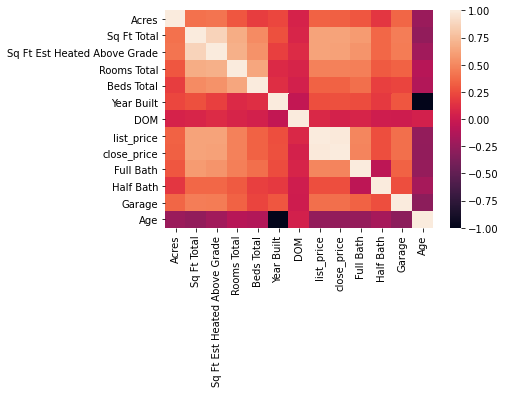

In [1629]:
corr_matrix = pairplotdf.corr()
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

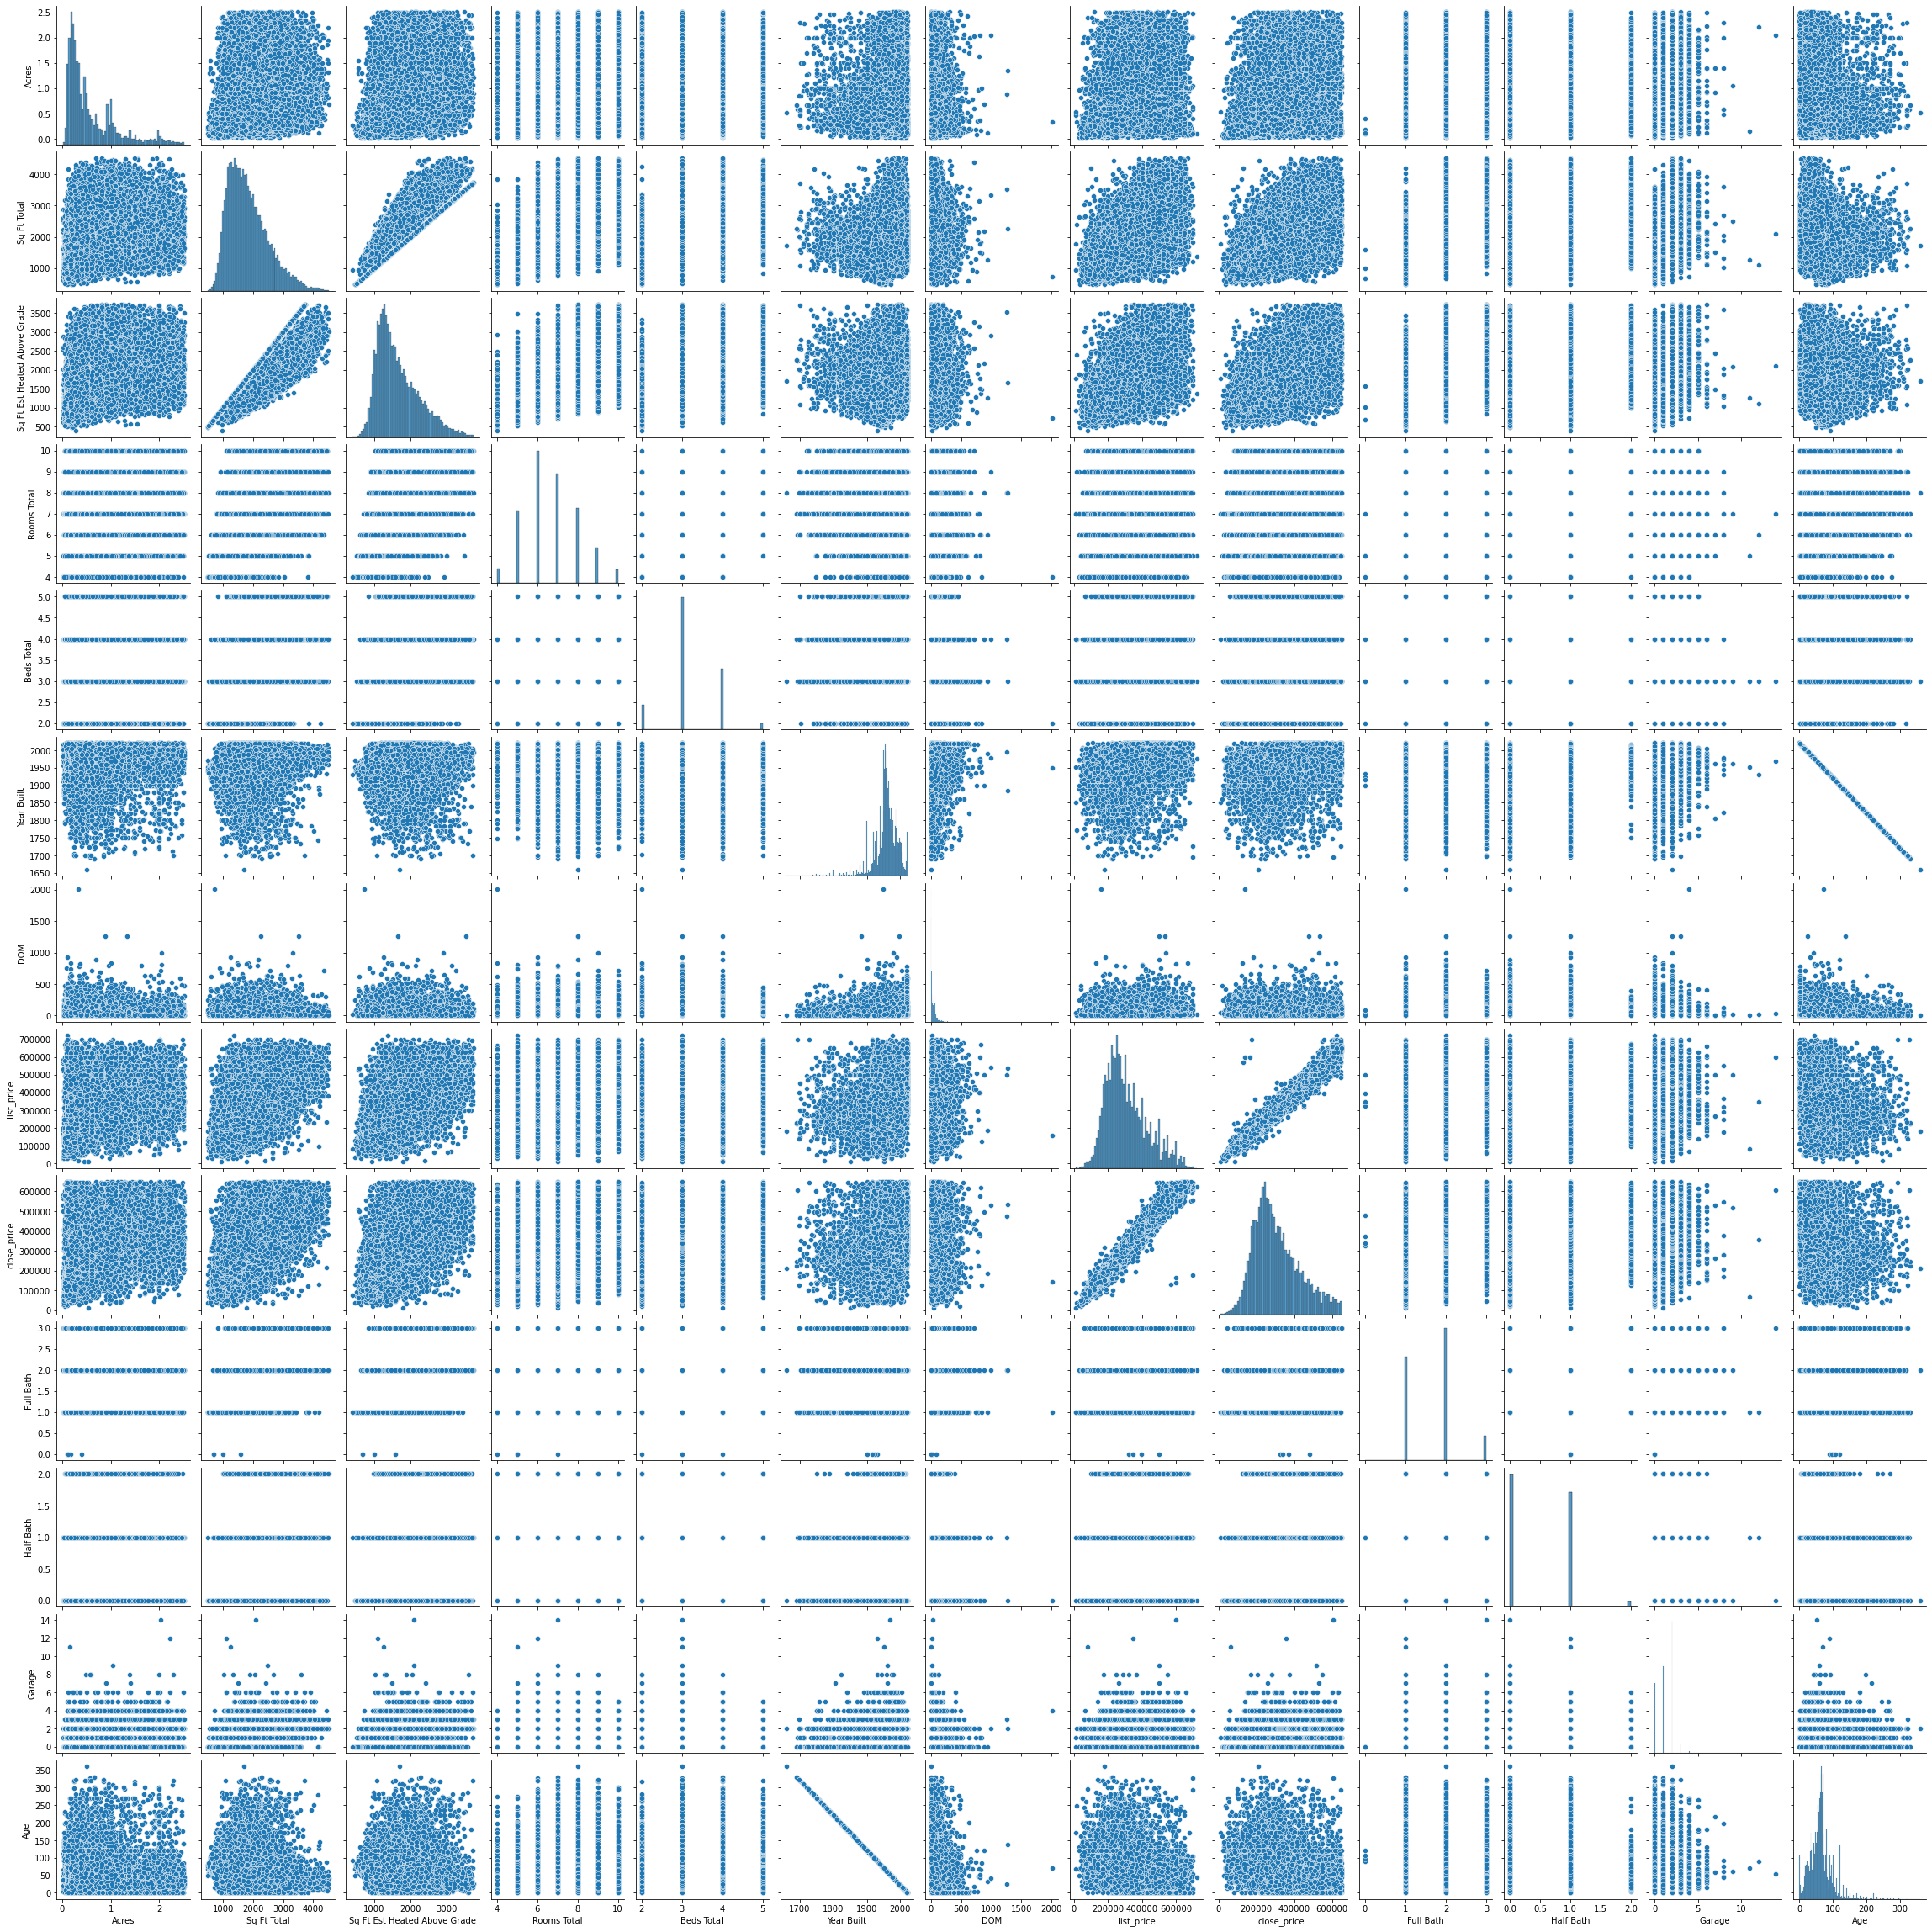

In [1630]:
sns.pairplot(listings)
plt.show()

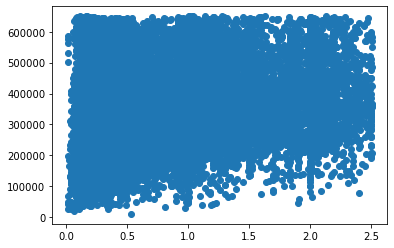

In [1631]:
plt.scatter(listings['Acres'],listings['close_price'])
plt.show()

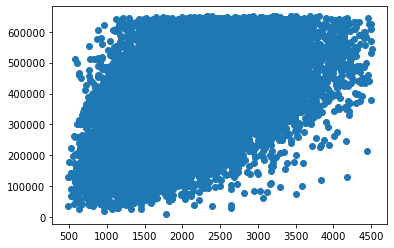

In [1632]:
plt.scatter(listings['Sq Ft Total'],listings['close_price'])
plt.show()

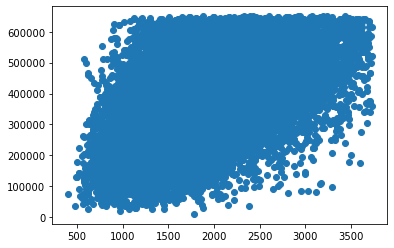

In [1633]:
plt.scatter(listings['Sq Ft Est Heated Above Grade'],listings['close_price'])
plt.show()

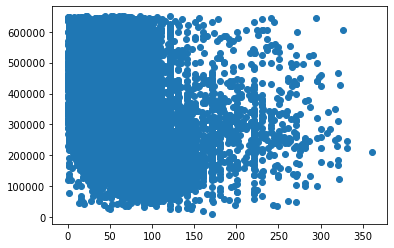

In [1634]:
plt.scatter(listings['Age'],listings['close_price'])
plt.show()

In [1635]:
listings['Age'].corr(listings['close_price'])

-0.27174297596422636

In [1636]:
listings.columns

Index(['MLS#', 'Status Change Timestamp', 'Address', 'City', 'Acres',
       'Sq Ft Total', 'Sq Ft Est Heated Above Grade', 'Style', 'Rooms Total',
       'Beds Total', 'Year Built', 'DOM', 'list_price', 'close_price',
       'Full Bath', 'Half Bath', 'Garage', 'Parking', 'Age', 'County'],
      dtype='object')

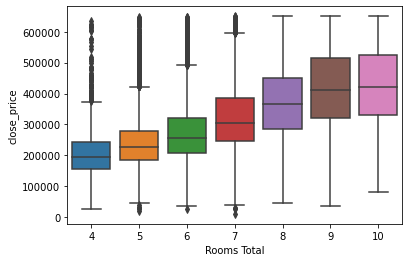

In [1637]:
sns.boxplot(x ='Rooms Total', y = 'close_price', data = listings)

plt.show()

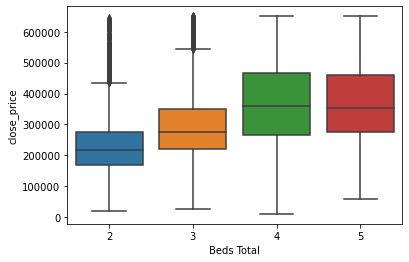

In [1638]:
sns.boxplot(x = 'Beds Total', y = 'close_price', data = listings)

plt.show()

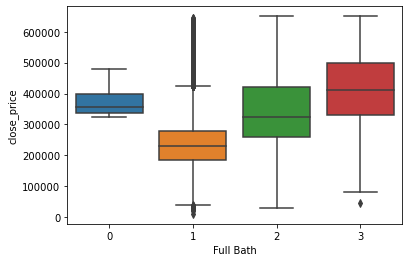

In [1639]:
sns.boxplot(x = 'Full Bath', y = 'close_price', data = listings)

plt.show()

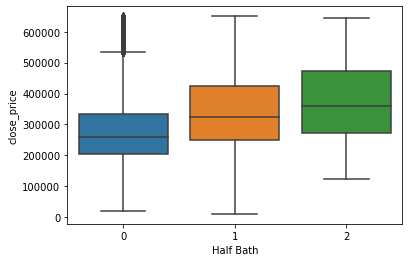

In [1640]:
sns.boxplot(x = 'Half Bath', y = 'close_price', data = listings)

plt.show()

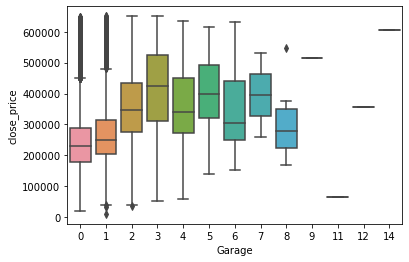

In [1641]:
sns.boxplot(x = 'Garage', y = 'close_price', data = listings)

plt.show()

In [1642]:
listings['Status Change Timestamp']

0       2021-05-14
2       2021-04-22
3       2020-09-02
4       2021-03-12
5       2020-08-31
           ...    
57197   2020-11-03
57198   2020-08-21
57204   2020-10-27
57208   2021-06-16
57209   2021-04-08
Name: Status Change Timestamp, Length: 33462, dtype: datetime64[ns]

In [1643]:
close_time = listings[['Status Change Timestamp','close_price']]

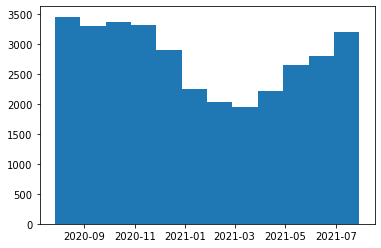

In [1644]:
plt.hist(close_time['Status Change Timestamp'], bins =12)
plt.show()

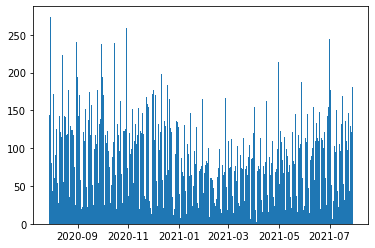

In [1645]:
plt.hist(close_time['Status Change Timestamp'], bins = 365)
plt.show()

In [1646]:
close_time.groupby('Status Change Timestamp').mean('close_price')

close_price
Status Change Timestamp               
2020-07-28               326870.884615
2020-07-29               296365.933333
2020-07-30               314468.875000
2020-07-31               316401.664234
2020-08-01               343032.654321
...                                ...
2021-07-25               317726.315789
2021-07-26               328252.261538
2021-07-27               324355.826446
2021-07-28               355501.935065
2021-07-29               332997.721154

[367 rows x 1 columns]

sqft total == sqft heated? 
count/ total = percentage ?

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

for correlation testing